In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.drop("Address",inplace=True,axis=1)

In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [6]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].values
Y = df["Price"].values

In [7]:
scale = MinMaxScaler()

In [8]:
X_scale = scale.fit_transform(X)
Y_scale = scale.fit_transform(Y.reshape(-1,1))

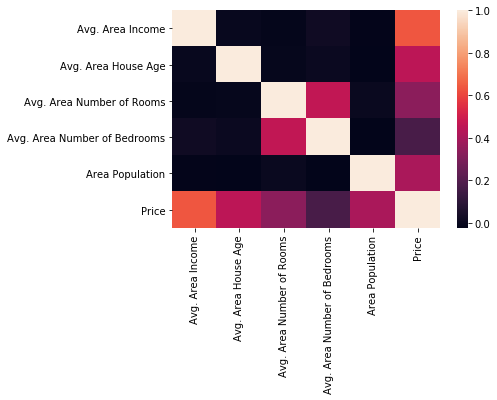

In [9]:
sns.heatmap(df.corr())

In [10]:
X_scale.shape

(5000, 5)

In [11]:
def fordward_propagation(X,Y):
    w = np.zeros((X.shape[1],1))
    b = 0
    y_cap = np.dot(X,w) + b
    return w,b

In [12]:
def backward_propagation(X,Y,w,b,learning_rate):
    m = X.shape[0]
    y_cap = np.dot(X,w) + b
    dw = (1/m)*np.dot(X.T,(y_cap-Y))
    db = (1/m)*np.sum(y_cap-Y)
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [22]:
def propogate(epoch,learning_rate):
    w,b = fordward_propagation(X_scale,Y_scale)
    loss =[]
    for i in range(epoch):
        w,b = backward_propagation(X_scale,Y_scale,w,b,learning_rate)
        y_cap = np.dot(X_scale,w) + b
        mse_loss = mean_squared_error(Y_scale,y_cap)
        loss.append(mse_loss)
        print("epoch:",i)
        print("mean square loss : ",float(mse_loss))
    print("w = ",w)
    print("b = ",b)
    return w,b,loss

In [24]:
weight,bias,loss = propogate(1000,0.01)

epoch: 0
mean square loss :  0.25505150777309693
epoch: 1
mean square loss :  0.24413616234070837
epoch: 2
mean square loss :  0.2337135258716683
epoch: 3
mean square loss :  0.2237613529371665
epoch: 4
mean square loss :  0.2142584024746904
epoch: 5
mean square loss :  0.20518439244155248
epoch: 6
mean square loss :  0.19651995651578175
epoch: 7
mean square loss :  0.18824660275194074
epoch: 8
mean square loss :  0.1803466741036051
epoch: 9
mean square loss :  0.17280331072822694
epoch: 10
mean square loss :  0.16560041399390876
epoch: 11
mean square loss :  0.15872261211124747
epoch: 12
mean square loss :  0.15215522731687806
epoch: 13
mean square loss :  0.1458842445386583
epoch: 14
mean square loss :  0.1398962814755999
epoch: 15
mean square loss :  0.13417856002867026
epoch: 16
mean square loss :  0.12871887902147547
epoch: 17
mean square loss :  0.12350558815258564
epoch: 18
mean square loss :  0.11852756312389592
epoch: 19
mean square loss :  0.11377418189192513
epoch: 20
mean s

epoch: 163
mean square loss :  0.013083421931330224
epoch: 164
mean square loss :  0.01307525218137732
epoch: 165
mean square loss :  0.01306734774665571
epoch: 166
mean square loss :  0.013059696693919938
epoch: 167
mean square loss :  0.01305228762865595
epoch: 168
mean square loss :  0.013045109670757801
epoch: 169
mean square loss :  0.013038152431302534
epoch: 170
mean square loss :  0.013031405990373654
epoch: 171
mean square loss :  0.013024860875885853
epoch: 172
mean square loss :  0.01301850804336579
epoch: 173
mean square loss :  0.013012338856645777
epoch: 174
mean square loss :  0.013006345069429085
epoch: 175
mean square loss :  0.013000518807687603
epoch: 176
mean square loss :  0.012994852552854218
epoch: 177
mean square loss :  0.012989339125774046
epoch: 178
mean square loss :  0.012983971671380263
epoch: 179
mean square loss :  0.012978743644061786
epoch: 180
mean square loss :  0.012973648793691646
epoch: 181
mean square loss :  0.012968681152286098
epoch: 182
mean 

epoch: 359
mean square loss :  0.012518306508261887
epoch: 360
mean square loss :  0.012516173283828157
epoch: 361
mean square loss :  0.012514040938941897
epoch: 362
mean square loss :  0.012511909471387856
epoch: 363
mean square loss :  0.012509778879014766
epoch: 364
mean square loss :  0.012507649159732523
epoch: 365
mean square loss :  0.012505520311509455
epoch: 366
mean square loss :  0.012503392332369734
epoch: 367
mean square loss :  0.012501265220390908
epoch: 368
mean square loss :  0.012499138973701534
epoch: 369
mean square loss :  0.01249701359047892
epoch: 370
mean square loss :  0.012494889068946975
epoch: 371
mean square loss :  0.01249276540737415
epoch: 372
mean square loss :  0.012490642604071475
epoch: 373
mean square loss :  0.01248852065739068
epoch: 374
mean square loss :  0.012486399565722409
epoch: 375
mean square loss :  0.012484279327494505
epoch: 376
mean square loss :  0.012482159941170383
epoch: 377
mean square loss :  0.012480041405247467
epoch: 378
mean

epoch: 555
mean square loss :  0.012115577361155249
epoch: 556
mean square loss :  0.012113596709788127
epoch: 557
mean square loss :  0.012111616764978801
epoch: 558
mean square loss :  0.0121096375260912
epoch: 559
mean square loss :  0.012107658992490083
epoch: 560
mean square loss :  0.012105681163541042
epoch: 561
mean square loss :  0.012103704038610491
epoch: 562
mean square loss :  0.012101727617065686
epoch: 563
mean square loss :  0.012099751898274697
epoch: 564
mean square loss :  0.012097776881606424
epoch: 565
mean square loss :  0.012095802566430596
epoch: 566
mean square loss :  0.012093828952117755
epoch: 567
mean square loss :  0.012091856038039271
epoch: 568
mean square loss :  0.012089883823567332
epoch: 569
mean square loss :  0.012087912308074942
epoch: 570
mean square loss :  0.012085941490935927
epoch: 571
mean square loss :  0.012083971371524924
epoch: 572
mean square loss :  0.01208200194921739
epoch: 573
mean square loss :  0.012080033223389589
epoch: 574
mean

epoch: 750
mean square loss :  0.011741986774454332
epoch: 751
mean square loss :  0.011740132813865947
epoch: 752
mean square loss :  0.01173827945013696
epoch: 753
mean square loss :  0.0117364266827726
epoch: 754
mean square loss :  0.011734574511278718
epoch: 755
mean square loss :  0.011732722935161803
epoch: 756
mean square loss :  0.011730871953928962
epoch: 757
mean square loss :  0.011729021567087942
epoch: 758
mean square loss :  0.011727171774147107
epoch: 759
mean square loss :  0.011725322574615447
epoch: 760
mean square loss :  0.011723473968002586
epoch: 761
mean square loss :  0.011721625953818765
epoch: 762
mean square loss :  0.011719778531574847
epoch: 763
mean square loss :  0.011717931700782322
epoch: 764
mean square loss :  0.011716085460953297
epoch: 765
mean square loss :  0.011714239811600507
epoch: 766
mean square loss :  0.011712394752237298
epoch: 767
mean square loss :  0.011710550282377639
epoch: 768
mean square loss :  0.011708706401536121
epoch: 769
mean

epoch: 936
mean square loss :  0.011406925922794664
epoch: 937
mean square loss :  0.0114051750905272
epoch: 938
mean square loss :  0.011403424773071734
epoch: 939
mean square loss :  0.011401674970036952
epoch: 940
mean square loss :  0.011399925681032024
epoch: 941
mean square loss :  0.011398176905666616
epoch: 942
mean square loss :  0.011396428643550869
epoch: 943
mean square loss :  0.011394680894295416
epoch: 944
mean square loss :  0.011392933657511374
epoch: 945
mean square loss :  0.01139118693281035
epoch: 946
mean square loss :  0.011389440719804425
epoch: 947
mean square loss :  0.011387695018106166
epoch: 948
mean square loss :  0.011385949827328625
epoch: 949
mean square loss :  0.011384205147085337
epoch: 950
mean square loss :  0.01138246097699031
epoch: 951
mean square loss :  0.011380717316658042
epoch: 952
mean square loss :  0.011378974165703507
epoch: 953
mean square loss :  0.011377231523742154
epoch: 954
mean square loss :  0.011375489390389916
epoch: 955
mean 

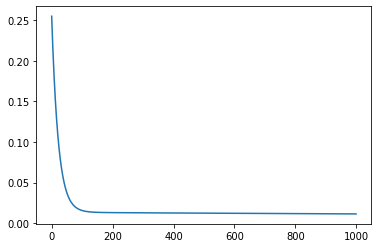

In [29]:
plt.plot(loss)